## 정리

선정된 5개의 역에 대한 change point detection 진행 및 시각화

## Step1. Import Libraries

In [2]:
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ruptures as rpt
from datetime import datetime, timedelta

## Step2. Load Datasets

In [ ]:
merged_df = pd.read_csv("data/processed_data.csv")

## Step3. Change Point Detection

#### 잠실역

In [7]:
station_jamsil = merged_df[merged_df['역명'] == '잠실(송파구청)']
station_jamsil = station_jamsil.groupby('사용일자').agg({'승차총승객수': 'sum', '하차총승객수': 'sum', 'social_distance': 'first', 'day_off': 'first', 'holiday': 'first'}).reset_index()
jamsil_data = pd.Series(np.array(station_jamsil['하차총승객수']), index=pd.date_range('2019-01-01', periods=1826, freq='D'))
ride_counts = station_jamsil[['사용일자', '하차총승객수']].copy()
ride_counts['사용일자'] = pd.to_datetime(ride_counts['사용일자'], format='%Y%m%d')
ride_counts.set_index('사용일자', inplace=True)
signal = ride_counts['하차총승객수'].values
algo = rpt.Pelt(model="rbf").fit(signal)
result_tmp = algo.predict(pen=1.5)
result = [cp for cp in result_tmp if cp < len(signal)]

In [11]:
count=0
jamsil_cp=[]
for cp in result:
  count=count+1
  tmp=pd.date_range('2019-01-01', periods=1826, freq='D')[cp]
  jamsil_cp.append(tmp)
print('total count:', count)

2019-04-06 00:00:00
2019-04-16 00:00:00
2019-12-12 00:00:00
2020-01-01 00:00:00
2020-01-26 00:00:00
2020-02-25 00:00:00
2020-05-05 00:00:00
2020-08-13 00:00:00
2020-10-12 00:00:00
2020-11-21 00:00:00
2021-02-14 00:00:00
2021-07-09 00:00:00
2021-10-12 00:00:00
2022-01-30 00:00:00
2022-02-04 00:00:00
2022-03-31 00:00:00
2022-09-22 00:00:00
2022-12-16 00:00:00
2022-12-31 00:00:00
2023-01-20 00:00:00
2023-01-25 00:00:00
2023-03-26 00:00:00
2023-04-05 00:00:00
2023-09-27 00:00:00
2023-10-12 00:00:00
2023-12-11 00:00:00
total count: 26


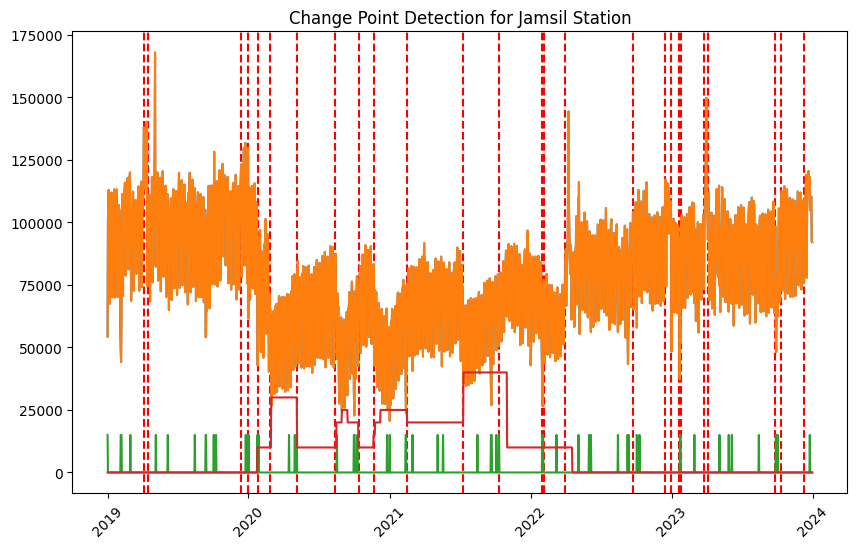

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ride_counts.index, signal)
for cp in result:
    ax.axvline(ride_counts.index[cp], color='red', linestyle='--')
ax.set_title('Change Point Detection for Jamsil Station')
plt.xticks(rotation=45)
plt.plot(jamsil_data, label='Original Data')
plt.plot(pd.Series(np.array(station_jamsil['day_off']*15000), index=pd.date_range('2019-01-01', periods=1826, freq='D')))
plt.plot(pd.Series(np.array(station_jamsil['social_distance']*10000), index=pd.date_range('2019-01-01', periods=1826, freq='D')))
plt.show()

#### 강남역

In [13]:
station_gangnam = merged_df[merged_df['역명'] == '강남']
station_gangnam = station_gangnam.groupby('사용일자').agg({'승차총승객수': 'sum', '하차총승객수': 'sum', 'social_distance': 'first', 'day_off': 'first', 'holiday': 'first'}).reset_index()
gangnam_data = pd.Series(np.array(station_gangnam['하차총승객수']), index=pd.date_range('2019-01-01', periods=1826, freq='D'))
ride_counts = station_gangnam[['사용일자', '하차총승객수']].copy()
ride_counts['사용일자'] = pd.to_datetime(ride_counts['사용일자'], format='%Y%m%d')
ride_counts.set_index('사용일자', inplace=True)
signal = ride_counts['하차총승객수'].values
algo = rpt.Pelt(model="rbf").fit(signal)
result_tmp = algo.predict(pen=1.5)
result = [cp for cp in result_tmp if cp < len(signal)]

In [17]:
count=0
gangnam_cp=[]
for cp in result:
  count=count+1
  tmp=pd.date_range('2019-01-01', periods=1826, freq='D')[cp]
  gangnam_cp.append(tmp)
print('total count:', count)

2019-03-02 00:00:00
2019-06-20 00:00:00
2019-08-24 00:00:00
2019-12-12 00:00:00
2020-01-26 00:00:00
2020-02-25 00:00:00
2020-04-10 00:00:00
2020-06-29 00:00:00
2020-08-13 00:00:00
2020-09-27 00:00:00
2020-10-12 00:00:00
2020-11-21 00:00:00
2021-01-25 00:00:00
2021-07-09 00:00:00
2021-10-12 00:00:00
2022-01-30 00:00:00
2022-02-04 00:00:00
2022-04-10 00:00:00
2023-01-20 00:00:00
2023-01-25 00:00:00
2023-09-27 00:00:00
2023-10-02 00:00:00
total count: 22


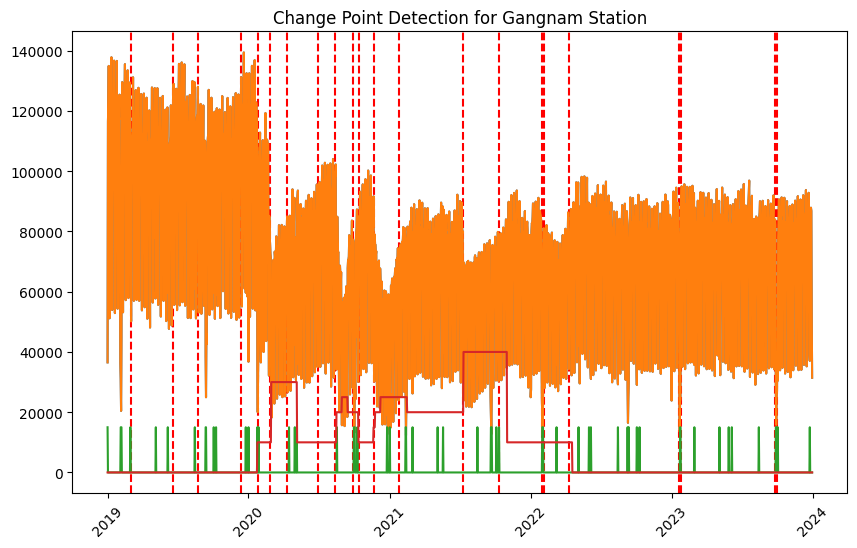

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ride_counts.index, signal)
for cp in result:
    ax.axvline(ride_counts.index[cp], color='red', linestyle='--')
ax.set_title('Change Point Detection for Gangnam Station')
plt.xticks(rotation=45)
plt.plot(gangnam_data, label='Original Data')
plt.plot(pd.Series(np.array(station_gangnam['day_off']*15000), index=pd.date_range('2019-01-01', periods=1826, freq='D')))
plt.plot(pd.Series(np.array(station_gangnam['social_distance']*10000), index=pd.date_range('2019-01-01', periods=1826, freq='D')))
plt.show()

#### 고속터미널

In [19]:
station_terminal = merged_df[merged_df['역명'] == '고속터미널']
station_terminal = station_terminal.groupby('사용일자').agg({'승차총승객수': 'sum', '하차총승객수': 'sum', 'social_distance': 'first', 'day_off': 'first', 'holiday': 'first'}).reset_index()
terminal_data = pd.Series(np.array(station_terminal['하차총승객수']), index=pd.date_range('2019-01-01', periods=1826, freq='D'))
ride_counts = station_terminal[['사용일자', '하차총승객수']].copy()
ride_counts['사용일자'] = pd.to_datetime(ride_counts['사용일자'], format='%Y%m%d')
ride_counts.set_index('사용일자', inplace=True)
signal = ride_counts['하차총승객수'].values
algo = rpt.Pelt(model="rbf").fit(signal)
result_tmp = algo.predict(pen=1.5)
result = [cp for cp in result_tmp if cp < len(signal)]

In [23]:
count=0
terminal_cp=[]
for cp in result:
  count=count+1
  tmp=pd.date_range('2019-01-01', periods=1826, freq='D')[cp]
  terminal_cp.append(tmp)
print('total count:', count)

2020-01-26 00:00:00
2020-02-25 00:00:00
2020-03-26 00:00:00
2020-04-25 00:00:00
2020-08-23 00:00:00
2020-09-17 00:00:00
2020-10-07 00:00:00
2020-11-21 00:00:00
2020-12-06 00:00:00
2021-01-20 00:00:00
2021-02-19 00:00:00
2021-07-09 00:00:00
2021-09-02 00:00:00
2021-10-22 00:00:00
2022-01-30 00:00:00
2022-03-31 00:00:00
2022-04-20 00:00:00
2022-09-07 00:00:00
2022-09-12 00:00:00
2023-01-20 00:00:00
2023-01-25 00:00:00
total count: 21


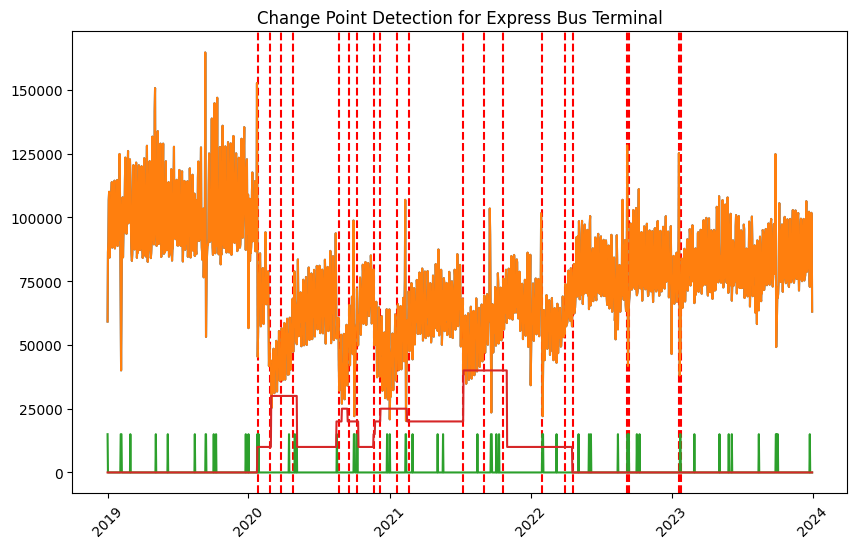

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ride_counts.index, signal)
for cp in result:
    ax.axvline(ride_counts.index[cp], color='red', linestyle='--')
ax.set_title('Change Point Detection for Express Bus Terminal')
plt.xticks(rotation=45)
plt.plot(terminal_data, label='Original Data')
plt.plot(pd.Series(np.array(station_terminal['day_off']*15000), index=pd.date_range('2019-01-01', periods=1826, freq='D')))
plt.plot(pd.Series(np.array(station_terminal['social_distance']*10000), index=pd.date_range('2019-01-01', periods=1826, freq='D')))
plt.show()

#### 서울역

In [25]:
station_seoul = merged_df[merged_df['역명'] == '서울역']
station_seoul = station_seoul.groupby('사용일자').agg({'승차총승객수': 'sum', '하차총승객수': 'sum', 'social_distance': 'first', 'day_off': 'first', 'holiday': 'first'}).reset_index()
seoul_data = pd.Series(np.array(station_seoul['하차총승객수']), index=pd.date_range('2019-01-01', periods=1826, freq='D'))
ride_counts = station_seoul[['사용일자', '하차총승객수']].copy()
ride_counts['사용일자'] = pd.to_datetime(ride_counts['사용일자'], format='%Y%m%d')
ride_counts.set_index('사용일자', inplace=True)
signal = ride_counts['하차총승객수'].values
algo = rpt.Pelt(model="rbf").fit(signal)
result_tmp = algo.predict(pen=1.5)
result = [cp for cp in result_tmp if cp < len(signal)]

In [29]:
count=0
seoul_cp=[]
for cp in result:
  count=count+1
  tmp=pd.date_range('2019-01-01', periods=1826, freq='D')[cp]
  seoul_cp.append(tmp)
print('total count:', count)

2019-02-10 00:00:00
2020-01-26 00:00:00
2020-02-25 00:00:00
2020-05-05 00:00:00
2020-08-13 00:00:00
2020-10-12 00:00:00
2020-11-21 00:00:00
2021-02-14 00:00:00
2021-07-09 00:00:00
2021-10-12 00:00:00
2022-01-30 00:00:00
2022-02-04 00:00:00
2022-04-05 00:00:00
2022-04-25 00:00:00
2022-09-22 00:00:00
2023-01-20 00:00:00
2023-01-25 00:00:00
2023-09-27 00:00:00
2023-10-07 00:00:00
total count: 19


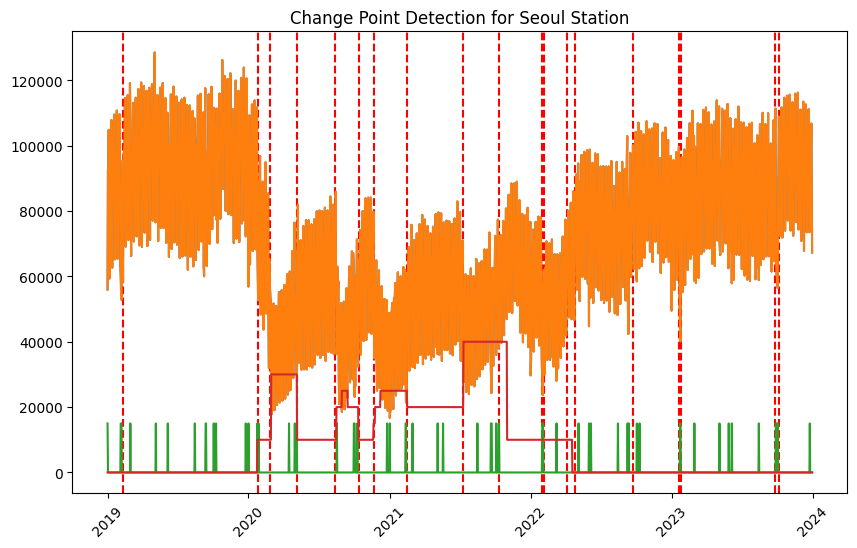

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ride_counts.index, signal)
for cp in result:
    ax.axvline(ride_counts.index[cp], color='red', linestyle='--')
ax.set_title('Change Point Detection for Seoul Station')
plt.xticks(rotation=45)
plt.plot(seoul_data, label='Original Data')
plt.plot(pd.Series(np.array(station_seoul['day_off']*15000), index=pd.date_range('2019-01-01', periods=1826, freq='D')))
plt.plot(pd.Series(np.array(station_seoul['social_distance']*10000), index=pd.date_range('2019-01-01', periods=1826, freq='D')))
plt.show()

#### 여의도

In [31]:
station_yeouido = merged_df[merged_df['역명'] == '여의도']
station_yeouido = station_yeouido.groupby('사용일자').agg({'승차총승객수': 'sum', '하차총승객수': 'sum', 'social_distance': 'first', 'day_off': 'first', 'holiday': 'first'}).reset_index()
yeouido_data = pd.Series(np.array(station_yeouido['하차총승객수']), index=pd.date_range('2019-01-01', periods=1826, freq='D'))
ride_counts = station_yeouido[['사용일자', '하차총승객수']].copy()
ride_counts['사용일자'] = pd.to_datetime(ride_counts['사용일자'], format='%Y%m%d')
ride_counts.set_index('사용일자', inplace=True)
signal = ride_counts['하차총승객수'].values
algo = rpt.Pelt(model="rbf").fit(signal)
result_tmp = algo.predict(pen=1.5)
result = [cp for cp in result_tmp if cp < len(signal)]

In [35]:
count=0
yeouido_cp=[]
for cp in result:
  count=count+1
  tmp=pd.date_range('2019-01-01', periods=1826, freq='D')[cp]
  yeouido_cp.append(tmp)
print('total count:', count)

2020-01-21 00:00:00
2020-02-25 00:00:00
2020-04-30 00:00:00
2020-05-05 00:00:00
2020-08-18 00:00:00
2020-09-27 00:00:00
2020-10-12 00:00:00
2020-11-26 00:00:00
2021-01-15 00:00:00
2021-02-24 00:00:00
2021-07-09 00:00:00
2021-08-23 00:00:00
2021-09-17 00:00:00
2021-09-27 00:00:00
2021-10-02 00:00:00
2021-10-12 00:00:00
2022-01-30 00:00:00
2022-02-04 00:00:00
2022-04-05 00:00:00
2022-04-30 00:00:00
2022-10-17 00:00:00
2023-01-20 00:00:00
2023-01-25 00:00:00
2023-09-27 00:00:00
2023-10-02 00:00:00
total count: 25


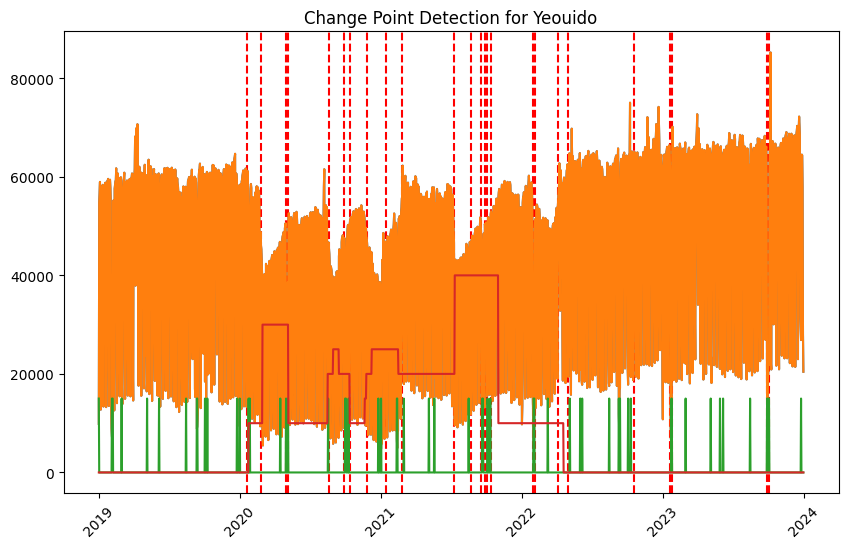

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ride_counts.index, signal)
for cp in result:
    ax.axvline(ride_counts.index[cp], color='red', linestyle='--')
ax.set_title('Change Point Detection for Yeouido')
plt.xticks(rotation=45)
plt.plot(yeouido_data, label='Original Data')
plt.plot(pd.Series(np.array(station_yeouido['day_off']*15000), index=pd.date_range('2019-01-01', periods=1826, freq='D')))
plt.plot(pd.Series(np.array(station_yeouido['social_distance']*10000), index=pd.date_range('2019-01-01', periods=1826, freq='D')))
plt.show()

#### 휴일 및 사회적 거리두기 조정일 list화

In [38]:
holiday=[]
social_distance_dif=[]
tmp=0
for i in range(len(station_jamsil['social_distance'])):
  if(station_jamsil['social_distance'][i]!=tmp): social_distance_dif.append(station_jamsil['사용일자'][i])
  tmp=station_jamsil['social_distance'][i]
for i in range(len(station_jamsil['day_off'])):
  if(station_jamsil['day_off'][i]==1): holiday.append(station_jamsil['사용일자'][i])

#### 역별 change point 비교

In [39]:
cp_data = {'Jamsil': jamsil_cp, 'Yeouido': yeouido_cp, 'Gangnam': gangnam_cp, 'Express Terminal': terminal_cp, 'Seoul Station': seoul_cp}
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in cp_data.items()]))


In [ ]:
## change point 저장
## df.to_csv('/data/cp_list.csv', index=False)

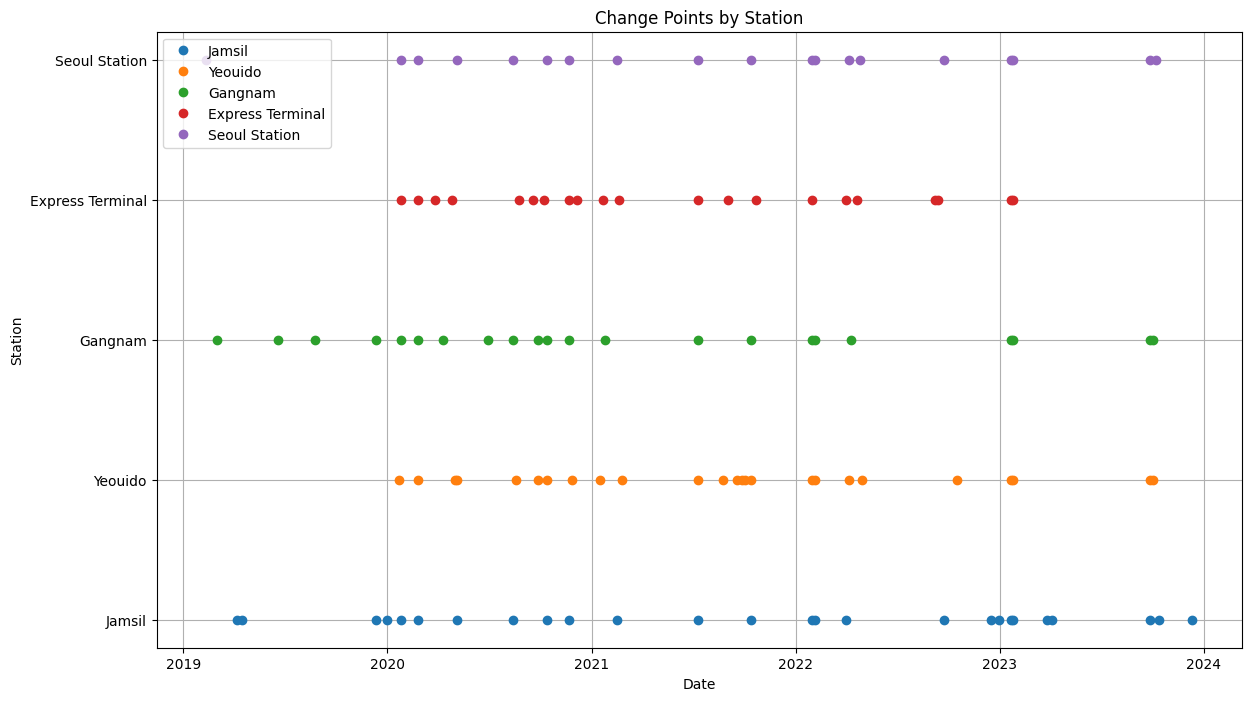

In [41]:
plt.figure(figsize=(14, 8))

for column in df.columns:
    plt.plot(pd.to_datetime(df[column].dropna()), [column]*df[column].dropna().shape[0], 'o', label=column)

plt.xlabel('Date')
plt.ylabel('Station')
plt.title('Change Points by Station')
plt.legend()
plt.grid(True)
plt.show()

#### 역별 change point와 휴일/사회적 거리두기 조정일과의 상관관계 찾기

In [63]:
change_points = {
    "잠실역": jamsil_cp,
    "강남역": gangnam_cp,
    "고속터미널": terminal_cp,
    "서울역": seoul_cp,
    "여의도역": yeouido_cp
}


# 날짜 형식 변환
def parse_dates(date_list):
    return [datetime.strptime(str(date), "%Y%m%d") if not isinstance(date, datetime) else date for date in date_list]

holiday = parse_dates(holiday)
social_distance_dif = parse_dates(social_distance_dif)

# 역별 변화점 날짜 형식 변환
for station in change_points:
    change_points[station] = [datetime.strptime(date, "%Y-%m-%d") if not isinstance(date, datetime) else date for date in change_points[station]]

# 날짜 비교 함수 (대략 이틀 차이까지 허용)
def find_near_dates(date, date_list, delta_days=2):
    near_dates = []
    for target_date in date_list:
        if abs((date - target_date).days) <= delta_days:
            near_dates.append(target_date)
    return near_dates

# 공휴일과 변화점 비교
holiday_results = {}
for station, points in change_points.items():
    matching_holidays = {date: find_near_dates(date, holiday) for date in points if find_near_dates(date, holiday)}
    holiday_results[station] = matching_holidays

# 사회적 거리두기 단계 변경과 변화점 비교
social_distancing_results = {}
for station, points in change_points.items():
    matching_distancing = {date: find_near_dates(date, social_distance_dif) for date in points if find_near_dates(date, social_distance_dif)}
    social_distancing_results[station] = matching_distancing

# 결과 출력
def print_matching_results(results, title):
    print(f"\n{title}")
    for station, matches in results.items():
        print(f"\n{station}:")
        for change_point, matching_dates in matches.items():
            matching_str = ', '.join([date.strftime('%Y-%m-%d') for date in matching_dates])
            print(f"  Change Point: {change_point.strftime('%Y-%m-%d')} - Matches: {matching_str}")

print_matching_results(holiday_results, "Matching Holidays with Change Points")
print_matching_results(social_distancing_results, "Matching Social Distancing Changes with Change Points")


Matching Holidays with Change Points

잠실역:
  Change Point: 2020-01-01 - Matches: 2020-01-01
  Change Point: 2020-01-26 - Matches: 2020-01-24, 2020-01-27
  Change Point: 2020-05-05 - Matches: 2020-05-05
  Change Point: 2021-02-14 - Matches: 2021-02-12
  Change Point: 2021-10-12 - Matches: 2021-10-11
  Change Point: 2022-01-30 - Matches: 2022-01-31, 2022-02-01
  Change Point: 2022-02-04 - Matches: 2022-02-02
  Change Point: 2023-01-25 - Matches: 2023-01-23, 2023-01-24
  Change Point: 2023-09-27 - Matches: 2023-09-28, 2023-09-29

강남역:
  Change Point: 2019-03-02 - Matches: 2019-03-01
  Change Point: 2020-01-26 - Matches: 2020-01-24, 2020-01-27
  Change Point: 2021-10-12 - Matches: 2021-10-11
  Change Point: 2022-01-30 - Matches: 2022-01-31, 2022-02-01
  Change Point: 2022-02-04 - Matches: 2022-02-02
  Change Point: 2023-01-25 - Matches: 2023-01-23, 2023-01-24
  Change Point: 2023-09-27 - Matches: 2023-09-28, 2023-09-29
  Change Point: 2023-10-02 - Matches: 2023-10-02, 2023-10-03

고속터미널:
 

#### 역별 change point 중 공통적인 공휴일 및 사회적 거리두기 변경일 찾기

In [69]:
# 역별 공통적인 공휴일 및 사회적 거리두기 변경일 찾기
def find_common_dates(results, threshold=3):
    date_count = {}
    date_stations = {}

    for station, matches in results.items():
        for change_point, matching_dates in matches.items():
            for matching_date in matching_dates:
                if matching_date not in date_count:
                    date_count[matching_date] = 0
                    date_stations[matching_date] = []
                date_count[matching_date] += 1
                if station not in date_stations[matching_date]:
                    date_stations[matching_date].append(station)

    common_dates = {date: stations for date, stations in date_stations.items() if date_count[date] >= threshold}
    return common_dates

common_holidays = find_common_dates(holiday_results)
common_social_distancing = find_common_dates(social_distancing_results)

# 결과 출력
def print_common_results(common_dates, title):
    print(f"\n{title}")
    for date, stations in common_dates.items():
        station_str = ', '.join(stations)
        print(f"Date: {date.strftime('%Y-%m-%d')} - Stations: {station_str}")

print_common_results(common_holidays, "Common Holidays with Change Points")
print_common_results(common_social_distancing, "Common Social Distancing Changes with Change Points")


Common Holidays with Change Points
Date: 2020-01-24 - Stations: 잠실역, 강남역, 고속터미널, 서울역
Date: 2020-01-27 - Stations: 잠실역, 강남역, 고속터미널, 서울역
Date: 2020-05-05 - Stations: 잠실역, 서울역, 여의도역
Date: 2021-10-11 - Stations: 잠실역, 강남역, 서울역, 여의도역
Date: 2022-01-31 - Stations: 잠실역, 강남역, 고속터미널, 서울역, 여의도역
Date: 2022-02-01 - Stations: 잠실역, 강남역, 고속터미널, 서울역, 여의도역
Date: 2022-02-02 - Stations: 잠실역, 강남역, 서울역, 여의도역
Date: 2023-01-23 - Stations: 잠실역, 강남역, 고속터미널, 서울역, 여의도역
Date: 2023-01-24 - Stations: 잠실역, 강남역, 고속터미널, 서울역, 여의도역
Date: 2023-09-28 - Stations: 잠실역, 강남역, 서울역, 여의도역
Date: 2023-09-29 - Stations: 잠실역, 강남역, 서울역, 여의도역

Common Social Distancing Changes with Change Points
Date: 2020-01-24 - Stations: 잠실역, 강남역, 고속터미널, 서울역
Date: 2020-05-06 - Stations: 잠실역, 서울역, 여의도역
Date: 2020-10-12 - Stations: 잠실역, 강남역, 서울역, 여의도역
Date: 2020-11-20 - Stations: 잠실역, 강남역, 고속터미널, 서울역
Date: 2021-07-11 - Stations: 잠실역, 강남역, 고속터미널, 서울역, 여의도역
